In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [58]:
df = pd.read_csv("2013_movies.csv")
df['Budget'] = df.fillna(np.mean(df['Budget']))['Budget']
df.tail(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
99,Her,23000000.0,25568251,Spike Jonze,R,120,2013-12-18 00:00:00


# Challenge 1

In [60]:
df_w_int = df.copy()
df_w_int["int"] = [1] * df.shape[0]
int_model = LinearRegression(fit_intercept = False)
int_model.fit(df_w_int[["int"]], df['DomesticTotalGross'])
int_pred = int_model.predict(df_w_int[["int"]])
int_pred[0]

100596875.22000003

### How can you interpret the results of this model? What does it predict? 

Ans: The result is simply the average of the labels in the training data.

### Make a plot of predictions against actual outcome. 

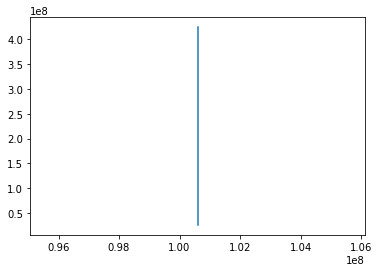

In [36]:
plt.plot(int_pred, df['DomesticTotalGross'])

### Make a histogram of residuals. How are the residuals distributed?

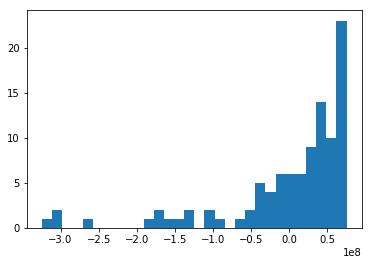

In [41]:
plt.hist(int_pred - df['DomesticTotalGross'], bins = 30)
plt.show()

Residuals are skewed to the left because a few blockbusters are driving the average.

# Challenge 2

In [61]:
slm_model = LinearRegression()
slm_model.fit(df[["Budget"]], df['DomesticTotalGross'])
slm_pred = slm_model.predict(df[["Budget"]])

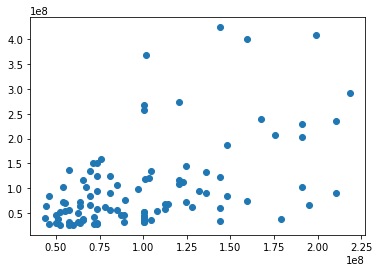

In [63]:
plt.scatter(slm_pred, df['DomesticTotalGross'])

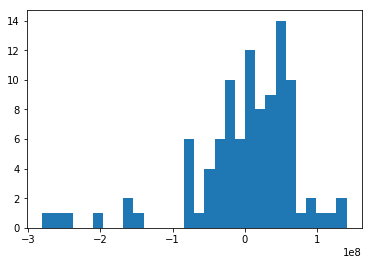

In [64]:
plt.hist(slm_pred - df['DomesticTotalGross'], bins = 30)
plt.show()

### How can you interpret what's happening in the model?

DomesticTotalGross is regressed on the one variable (Budget). 
The residuals represent errors unable to be explained by Budget.

### Challenge 3

In [73]:
df_w_rating = df.merge(pd.get_dummies(df['Rating']).iloc[:, :-1], left_index = True, right_index = True)

In [76]:
twovars_model = LinearRegression()
twovars_model.fit(df_w_rating[["Budget", 'G', 'PG', "PG-13"]], df['DomesticTotalGross'])
twovars_pred = twovars_model.predict(df_w_rating[["Budget", 'G', 'PG', "PG-13"]])

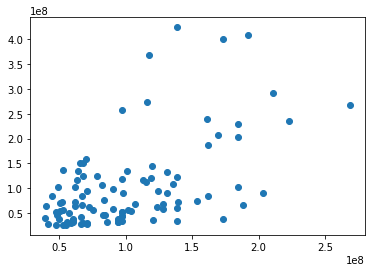

In [78]:
plt.scatter(twovars_pred, df['DomesticTotalGross'])

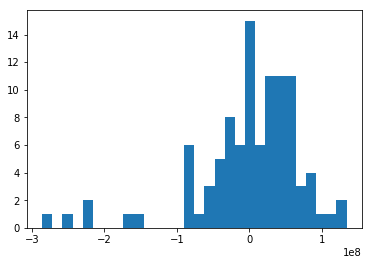

In [79]:
plt.hist(twovars_pred - df['DomesticTotalGross'], bins = 30)
plt.show()

### How can you interpret what's happening in the model?

Residuals are further decreased because now the effects of both Budget and ratings are accounted for in the prediction.

# Challenge 4

In [80]:
df_w_rating.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate', 'G', 'PG', 'PG-13'],
      dtype='object')

In [81]:
cols = ['Budget', 'G', 'PG', 'PG-13', 'Runtime']
mlm_model = LinearRegression()
mlm_model.fit(df_w_rating[cols], df['DomesticTotalGross'])
mlm_pred = mlm_model.predict(df_w_rating[cols])

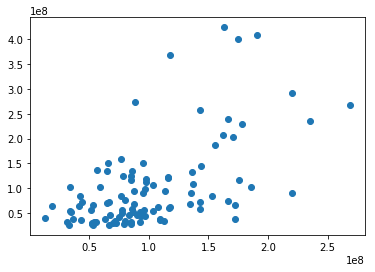

In [82]:
plt.scatter(mlm_pred, df['DomesticTotalGross'])

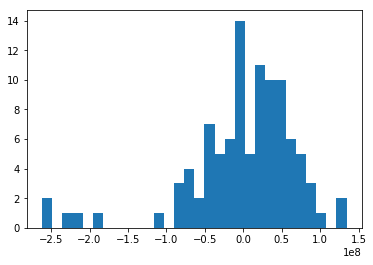

In [84]:
plt.hist(mlm_pred - df['DomesticTotalGross'], bins = 30)
plt.show()

### Think about how you build the model matrix and how to interpret what the model is doing.

I am gradually adding column dimensions into the model matrix. The model is accounting for more and more factors in its prediction.

# Challenge 5

### Divide your data into two sets

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df_w_rating[cols], df['DomesticTotalGross'], test_size=0.25)

### Fit a model on the training set

In [89]:
final_model = LinearRegression()
fit = final_model.fit(X_train, y_train)

### Check the predictions in the test set

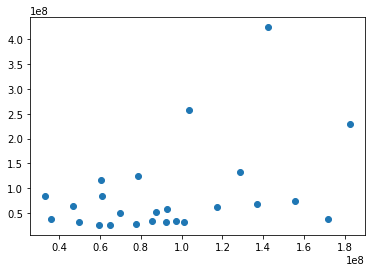

In [92]:
final_pred = final_model.predict(X_test)
plt.scatter(final_pred, y_test)